# Importing Libraries

In [0]:
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import InceptionResNetV2
from keras.preprocessing.image import ImageDataGenerator

# Download Dataset

In [3]:
!wget http://www.recod.ic.unicamp.br/~feandalo/MO444_dogs.tar.gz

--2018-05-24 22:58:49--  http://www.recod.ic.unicamp.br/~feandalo/MO444_dogs.tar.gz
Resolving www.recod.ic.unicamp.br (www.recod.ic.unicamp.br)... 143.106.7.151
Connecting to www.recod.ic.unicamp.br (www.recod.ic.unicamp.br)|143.106.7.151|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1260424819 (1.2G) [application/x-gzip]
Saving to: ‘MO444_dogs.tar.gz’

MO444_dogs.tar.gz    84%[===============>    ]   1010M  24.2MB/s    eta 10s    

MO444_dogs.tar.gz   100%[===================>]   1.17G  24.3MB/s    in 57s     

2018-05-24 22:59:46 (21.1 MB/s) - ‘MO444_dogs.tar.gz’ saved [1260424819/1260424819]



In [0]:
# Extracting file
!apt-get install p7zip-full
!7z e MO444_dogs.tar.gz
!tar -xvf MO444_dogs.tar

# Importing Dataset From Google Drive

In [45]:
# Installing PyDrive
!pip install PyDrive

In [0]:
# Authenticating user
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Verify list of google drive's IDs
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  if file1['title'] == 'dogbreed.zip':
    ID = file1['id']

In [48]:
# Searching the dataset in google drive
fileId = drive.CreateFile({'id': ID})
print(fileId['title'])
fileId.GetContentFile('dogbreed.zip')

dogbreed.zip


In [49]:
# Unzipping the dataset
!unzip dogbreed.zip

Archive:  dogbreed.zip
   creating: MO444_dogs/
   creating: MO444_dogs/val/
   creating: MO444_dogs/val/26/
  inflating: MO444_dogs/val/26/26_0027.jpg  
  inflating: MO444_dogs/val/26/26_0028.jpg  
  inflating: MO444_dogs/val/26/26_0022.jpg  
  inflating: MO444_dogs/val/26/26_0024.jpg  
  inflating: MO444_dogs/val/26/26_0021.jpg  
  inflating: MO444_dogs/val/26/26_0023.jpg  
  inflating: MO444_dogs/val/26/26_0039.jpg  
  inflating: MO444_dogs/val/26/26_0009.jpg  
  inflating: MO444_dogs/val/26/26_0038.jpg  
  inflating: MO444_dogs/val/26/26_0036.jpg  
  inflating: MO444_dogs/val/26/26_0010.jpg  
  inflating: MO444_dogs/val/26/26_0050.jpg  
  inflating: MO444_dogs/val/26/26_0017.jpg  
  inflating: MO444_dogs/val/26/26_0016.jpg  
  inflating: MO444_dogs/val/26/26_0006.jpg  
  inflating: MO444_dogs/val/26/26_0012.jpg  
  inflating: MO444_dogs/val/26/26_0025.jpg  
  inflating: MO444_dogs/val/26/26_0002.jpg  
  inflating: MO444_dogs/val/26/26_0040.jpg  
  inflating: MO444_dogs/val/26/26_00


  inflating: MO444_dogs/val/46/46_0004.jpg  
  inflating: MO444_dogs/val/46/46_0041.jpg  
  inflating: MO444_dogs/val/46/46_0031.jpg  
  inflating: MO444_dogs/val/46/46_0025.jpg  
  inflating: MO444_dogs/val/46/46_0056.jpg  
  inflating: MO444_dogs/val/46/46_0014.jpg  
  inflating: MO444_dogs/val/46/46_0042.jpg  
  inflating: MO444_dogs/val/46/46_0022.jpg  
  inflating: MO444_dogs/val/46/46_0021.jpg  
  inflating: MO444_dogs/val/46/46_0049.jpg  
  inflating: MO444_dogs/val/46/46_0010.jpg  
  inflating: MO444_dogs/val/46/46_0017.jpg  
  inflating: MO444_dogs/val/46/46_0053.jpg  
  inflating: MO444_dogs/val/46/46_0060.jpg  
  inflating: MO444_dogs/val/46/46_0064.jpg  
  inflating: MO444_dogs/val/46/46_0019.jpg  
  inflating: MO444_dogs/val/46/46_0058.jpg  
  inflating: MO444_dogs/val/46/46_0047.jpg  
  inflating: MO444_dogs/val/46/46_0066.jpg  
  inflating: MO444_dogs/val/46/46_0026.jpg  
  inflating: MO444_dogs/val/46/46_0015.jpg  
  inflating: MO444_dogs/val/46/46_0011.jpg  
   creati


  inflating: MO444_dogs/val/18/18_0005.jpg  
  inflating: MO444_dogs/val/18/18_0031.jpg  
   creating: MO444_dogs/val/75/
  inflating: MO444_dogs/val/75/75_0005.jpg  
  inflating: MO444_dogs/val/75/75_0073.jpg  
  inflating: MO444_dogs/val/75/75_0077.jpg  
  inflating: MO444_dogs/val/75/75_0026.jpg  
  inflating: MO444_dogs/val/75/75_0024.jpg  
  inflating: MO444_dogs/val/75/75_0044.jpg  
  inflating: MO444_dogs/val/75/75_0071.jpg  
  inflating: MO444_dogs/val/75/75_0031.jpg  
  inflating: MO444_dogs/val/75/75_0042.jpg  
  inflating: MO444_dogs/val/75/75_0011.jpg  
  inflating: MO444_dogs/val/75/75_0069.jpg  
  inflating: MO444_dogs/val/75/75_0018.jpg  
  inflating: MO444_dogs/val/75/75_0058.jpg  
  inflating: MO444_dogs/val/75/75_0039.jpg  
  inflating: MO444_dogs/val/75/75_0035.jpg  
  inflating: MO444_dogs/val/75/75_0020.jpg  
  inflating: MO444_dogs/val/75/75_0006.jpg  
  inflating: MO444_dogs/val/75/75_0078.jpg  
  inflating: MO444_dogs/val/75/75_0010.jpg  
  inflating: MO444_dog


  inflating: MO444_dogs/val/28/28_0012.jpg  
  inflating: MO444_dogs/val/28/28_0026.jpg  
  inflating: MO444_dogs/val/28/28_0007.jpg  
  inflating: MO444_dogs/val/28/28_0016.jpg  
  inflating: MO444_dogs/val/28/28_0022.jpg  
  inflating: MO444_dogs/val/28/28_0033.jpg  
  inflating: MO444_dogs/val/28/28_0003.jpg  
  inflating: MO444_dogs/val/28/28_0000.jpg  
  inflating: MO444_dogs/val/28/28_0021.jpg  
  inflating: MO444_dogs/val/28/28_0035.jpg  
  inflating: MO444_dogs/val/28/28_0018.jpg  
  inflating: MO444_dogs/val/28/28_0039.jpg  
  inflating: MO444_dogs/val/28/28_0034.jpg  
  inflating: MO444_dogs/val/28/28_0019.jpg  
  inflating: MO444_dogs/val/28/28_0044.jpg  
  inflating: MO444_dogs/val/28/28_0015.jpg  
  inflating: MO444_dogs/val/28/28_0013.jpg  
  inflating: MO444_dogs/val/28/28_0009.jpg  
  inflating: MO444_dogs/val/28/28_0043.jpg  
  inflating: MO444_dogs/val/28/28_0024.jpg  
  inflating: MO444_dogs/val/28/28_0011.jpg  
  inflating: MO444_dogs/val/28/28_0023.jpg  
  inflati


  inflating: MO444_dogs/val/27/27_0011.jpg  
  inflating: MO444_dogs/val/27/27_0014.jpg  
  inflating: MO444_dogs/val/27/27_0055.jpg  
  inflating: MO444_dogs/val/27/27_0006.jpg  
  inflating: MO444_dogs/val/27/27_0047.jpg  
  inflating: MO444_dogs/val/27/27_0037.jpg  
  inflating: MO444_dogs/val/27/27_0071.jpg  
  inflating: MO444_dogs/val/27/27_0066.jpg  
  inflating: MO444_dogs/val/27/27_0063.jpg  
  inflating: MO444_dogs/val/27/27_0061.jpg  
  inflating: MO444_dogs/val/27/27_0056.jpg  
  inflating: MO444_dogs/val/27/27_0010.jpg  
  inflating: MO444_dogs/val/27/27_0030.jpg  
  inflating: MO444_dogs/val/27/27_0049.jpg  
  inflating: MO444_dogs/val/27/27_0057.jpg  
  inflating: MO444_dogs/val/27/27_0040.jpg  
  inflating: MO444_dogs/val/27/27_0059.jpg  
  inflating: MO444_dogs/val/27/27_0080.jpg  
  inflating: MO444_dogs/val/27/27_0023.jpg  
  inflating: MO444_dogs/val/27/27_0077.jpg  
  inflating: MO444_dogs/val/27/27_0021.jpg  
  inflating: MO444_dogs/val/27/27_0000.jpg  
  inflati

  inflating: MO444_dogs/val/60/60_0034.jpg  
  inflating: MO444_dogs/val/60/60_0073.jpg  
  inflating: MO444_dogs/val/60/60_0084.jpg  
  inflating: MO444_dogs/val/60/60_0068.jpg  
  inflating: MO444_dogs/val/60/60_0041.jpg  
  inflating: MO444_dogs/val/60/60_0096.jpg  
  inflating: MO444_dogs/val/60/60_0067.jpg  
  inflating: MO444_dogs/val/60/60_0044.jpg  
  inflating: MO444_dogs/val/60/60_0076.jpg  
  inflating: MO444_dogs/val/60/60_0086.jpg  
  inflating: MO444_dogs/val/60/60_0060.jpg  
  inflating: MO444_dogs/val/60/60_0056.jpg  
  inflating: MO444_dogs/val/60/60_0021.jpg  
  inflating: MO444_dogs/val/60/60_0008.jpg  
  inflating: MO444_dogs/val/60/60_0094.jpg  
  inflating: MO444_dogs/val/60/60_0009.jpg  
  inflating: MO444_dogs/val/60/60_0023.jpg  
  inflating: MO444_dogs/val/60/60_0024.jpg  
  inflating: MO444_dogs/val/60/60_0082.jpg  
  inflating: MO444_dogs/val/60/60_0079.jpg  
  inflating: MO444_dogs/val/60/60_0039.jpg  
  inflating: MO444_dogs/val/60/60_0028.jpg  
  inflatin


  inflating: MO444_dogs/val/36/36_0051.jpg  
  inflating: MO444_dogs/val/36/36_0024.jpg  
  inflating: MO444_dogs/val/36/36_0067.jpg  
  inflating: MO444_dogs/val/36/36_0026.jpg  
  inflating: MO444_dogs/val/36/36_0071.jpg  
  inflating: MO444_dogs/val/36/36_0072.jpg  
  inflating: MO444_dogs/val/36/36_0033.jpg  
  inflating: MO444_dogs/val/36/36_0046.jpg  
  inflating: MO444_dogs/val/36/36_0081.jpg  
  inflating: MO444_dogs/val/36/36_0059.jpg  
  inflating: MO444_dogs/val/36/36_0097.jpg  
  inflating: MO444_dogs/val/36/36_0058.jpg  
  inflating: MO444_dogs/val/36/36_0007.jpg  
  inflating: MO444_dogs/val/36/36_0047.jpg  
  inflating: MO444_dogs/val/36/36_0057.jpg  
  inflating: MO444_dogs/val/36/36_0009.jpg  
  inflating: MO444_dogs/val/36/36_0011.jpg  
  inflating: MO444_dogs/val/36/36_0080.jpg  
  inflating: MO444_dogs/val/36/36_0002.jpg  
  inflating: MO444_dogs/val/36/36_0016.jpg  
  inflating: MO444_dogs/val/36/36_0036.jpg  
  inflating: MO444_dogs/val/36/36_0095.jpg  
  inflati


  inflating: MO444_dogs/val/19/19_0010.jpg  
  inflating: MO444_dogs/val/19/19_0000.jpg  
  inflating: MO444_dogs/val/19/19_0046.jpg  
  inflating: MO444_dogs/val/19/19_0001.jpg  
   creating: MO444_dogs/val/38/
  inflating: MO444_dogs/val/38/38_0037.jpg  
  inflating: MO444_dogs/val/38/38_0022.jpg  
  inflating: MO444_dogs/val/38/38_0056.jpg  
  inflating: MO444_dogs/val/38/38_0035.jpg  
  inflating: MO444_dogs/val/38/38_0057.jpg  
  inflating: MO444_dogs/val/38/38_0046.jpg  
  inflating: MO444_dogs/val/38/38_0036.jpg  
  inflating: MO444_dogs/val/38/38_0032.jpg  
  inflating: MO444_dogs/val/38/38_0033.jpg  
  inflating: MO444_dogs/val/38/38_0029.jpg  
  inflating: MO444_dogs/val/38/38_0049.jpg  
  inflating: MO444_dogs/val/38/38_0011.jpg  
  inflating: MO444_dogs/val/38/38_0044.jpg  
  inflating: MO444_dogs/val/38/38_0030.jpg  
  inflating: MO444_dogs/val/38/38_0006.jpg  
  inflating: MO444_dogs/val/38/38_0005.jpg  
  inflating: MO444_dogs/val/38/38_0017.jpg  
  inflating: MO444_dog


  inflating: MO444_dogs/val/10/10_0042.jpg  
  inflating: MO444_dogs/val/10/10_0035.jpg  
  inflating: MO444_dogs/val/10/10_0010.jpg  
  inflating: MO444_dogs/val/10/10_0030.jpg  
  inflating: MO444_dogs/val/10/10_0034.jpg  
  inflating: MO444_dogs/val/10/10_0006.jpg  
  inflating: MO444_dogs/val/10/10_0054.jpg  
  inflating: MO444_dogs/val/10/10_0033.jpg  
  inflating: MO444_dogs/val/10/10_0053.jpg  
  inflating: MO444_dogs/val/10/10_0005.jpg  
  inflating: MO444_dogs/val/10/10_0039.jpg  
  inflating: MO444_dogs/val/10/10_0016.jpg  
  inflating: MO444_dogs/val/10/10_0040.jpg  
  inflating: MO444_dogs/val/10/10_0029.jpg  
  inflating: MO444_dogs/val/10/10_0001.jpg  
  inflating: MO444_dogs/val/10/10_0013.jpg  
  inflating: MO444_dogs/val/10/10_0052.jpg  
  inflating: MO444_dogs/val/10/10_0038.jpg  
  inflating: MO444_dogs/val/10/10_0014.jpg  
  inflating: MO444_dogs/val/10/10_0024.jpg  
  inflating: MO444_dogs/val/10/10_0012.jpg  
  inflating: MO444_dogs/val/10/10_0009.jpg  
  inflati


  inflating: MO444_dogs/val/61/61_0006.jpg  
  inflating: MO444_dogs/val/61/61_0034.jpg  
  inflating: MO444_dogs/val/61/61_0033.jpg  
  inflating: MO444_dogs/val/61/61_0074.jpg  
  inflating: MO444_dogs/val/61/61_0075.jpg  
  inflating: MO444_dogs/val/61/61_0097.jpg  
  inflating: MO444_dogs/val/61/61_0068.jpg  
  inflating: MO444_dogs/val/61/61_0023.jpg  
  inflating: MO444_dogs/val/61/61_0009.jpg  
  inflating: MO444_dogs/val/61/61_0089.jpg  
  inflating: MO444_dogs/val/61/61_0080.jpg  
  inflating: MO444_dogs/val/61/61_0067.jpg  
  inflating: MO444_dogs/val/61/61_0051.jpg  
  inflating: MO444_dogs/val/61/61_0094.jpg  
  inflating: MO444_dogs/val/61/61_0040.jpg  
  inflating: MO444_dogs/val/61/61_0037.jpg  
  inflating: MO444_dogs/val/61/61_0054.jpg  
  inflating: MO444_dogs/val/61/61_0007.jpg  
  inflating: MO444_dogs/val/61/61_0093.jpg  
  inflating: MO444_dogs/val/61/61_0059.jpg  
  inflating: MO444_dogs/val/61/61_0078.jpg  
  inflating: MO444_dogs/val/61/61_0100.jpg  
  inflati

  inflating: MO444_dogs/test/24e9d6086003484192aa49b2cc859de3.jpg  
  inflating: MO444_dogs/test/bb9c606da9694019983b8dc02b0977e4.jpg  
  inflating: MO444_dogs/test/749591c2ccb449e39c00926ed7eea5c0.jpg  
  inflating: MO444_dogs/test/62a19c7f35c541e788251052d28e9f29.jpg  
  inflating: MO444_dogs/test/fa5e1ce490fe4e038d3d1f24c73b62fa.jpg  
  inflating: MO444_dogs/test/e110ded74d094d8fb659de1f1d3c1a16.jpg  
  inflating: MO444_dogs/test/a3dc1c1c30a949fc8ee3b869dfcc67a2.jpg  
  inflating: MO444_dogs/test/31cfdffa0bb94da38ae17afb371b5524.jpg  
  inflating: MO444_dogs/test/dd5259677aa64473b4fc62df7941e40c.jpg  
  inflating: MO444_dogs/test/26770f1887044f049feb3f52027a9082.jpg  
  inflating: MO444_dogs/test/02b49b0260644d0c87825f6176c92815.jpg  
  inflating: MO444_dogs/test/3a8b56be553f45f48b813fdae97c8012.jpg  
  inflating: MO444_dogs/test/8abe445cf5f34e01a20b219936565e85.jpg  
  inflating: MO444_dogs/test/90848d4a8b854498b9178d0ea8b7bb96.jpg  
  inflating: MO444_dogs/test/4b784bd431894a378e3


  inflating: MO444_dogs/test/fd3b0b1cbc5a4fb3bb8b28a8b0ac37e3.jpg  
  inflating: MO444_dogs/test/83223a47d83c4af88543de6fbae2e4c0.jpg  
  inflating: MO444_dogs/test/92d783ab50764b83bb01676f48b8cf7d.jpg  
  inflating: MO444_dogs/test/4aee2a144f7e43ed836bf1b5c90bb77a.jpg  
  inflating: MO444_dogs/test/5e4187a54fd341dc99c5cd72c23f405b.jpg  
  inflating: MO444_dogs/test/c0f8ddfbc7554193bcc5d45085456b03.jpg  
  inflating: MO444_dogs/test/b00ce9b8364048e9b0b9d9892d0e11ef.jpg  
  inflating: MO444_dogs/test/ed8624c2160348ce9945f099ab487b7d.jpg  
  inflating: MO444_dogs/test/7d8e40d4ebf64ba18f6918066bf1700f.jpg  
  inflating: MO444_dogs/test/193437912bfc45d194e1d347c499fb85.jpg  
  inflating: MO444_dogs/test/35ae6c56b2f5474ead046516ec527a66.jpg  
  inflating: MO444_dogs/test/ac271f177ee8493690d078e79e4faeec.jpg  
  inflating: MO444_dogs/test/8308147cbcf1425ea7096f3864ecd4c8.jpg  
  inflating: MO444_dogs/test/d0e9129915494b1b8ea96d207d7a99af.jpg  
  inflating: MO444_dogs/test/4483454ed4084ff680

  inflating: MO444_dogs/test/ffce73d8dbd44830846bb37f6c3ba5a9.jpg  
  inflating: MO444_dogs/test/b550ef6ec5474a96bc01633db0ed0009.jpg  
  inflating: MO444_dogs/test/56c8be4b207c442cad85fe9888b9688f.jpg  
  inflating: MO444_dogs/test/97500484ba7f492783ac556d025457d4.jpg  
  inflating: MO444_dogs/test/5479fddb19424b759973c088d505b91c.jpg  
  inflating: MO444_dogs/test/736d457c58454715829514a6e136a431.jpg  
  inflating: MO444_dogs/test/642b891fc5e44320a5e11edfdd9b3c29.jpg  
  inflating: MO444_dogs/test/30b05997f18c4e0392fbf8574382ceeb.jpg  
  inflating: MO444_dogs/test/e2238469e9984f94b2a9a913468038f5.jpg  
  inflating: MO444_dogs/test/a4664cf63a614822a1e9f848d3c18728.jpg  
  inflating: MO444_dogs/test/3b72b3ced9784a308d69dafefd1e62fa.jpg  
  inflating: MO444_dogs/test/3c5e10d970a047e5adc176f0c812cc56.jpg  
  inflating: MO444_dogs/test/a06edfc99d524b67a7df42763e5b9f45.jpg  
  inflating: MO444_dogs/test/894e9388f70b410cbdc0dd89317f110e.jpg  
  inflating: MO444_dogs/test/3a8c4604d55c413fa87


  inflating: MO444_dogs/test/76bc367794394d1787d102fde0fa849e.jpg  
  inflating: MO444_dogs/test/773e32746d864b67a6a11812c58a7a18.jpg  
  inflating: MO444_dogs/test/de4204adbb8e436daa2bccd74389c679.jpg  
  inflating: MO444_dogs/test/a5fe501bb92b4e0296522c2ec55abd81.jpg  
  inflating: MO444_dogs/test/bdf2ec599e6845e395b95296299be24b.jpg  
  inflating: MO444_dogs/test/3dd6b7a92d6d4053a4db8ce344ce4385.jpg  
  inflating: MO444_dogs/test/7d7d7bbf915c400fba291542f73d5cfe.jpg  
  inflating: MO444_dogs/test/aa2a2c28ec754082af232f13a43467aa.jpg  
  inflating: MO444_dogs/test/0796417c63e04d71910d13dfaf0da6a2.jpg  
  inflating: MO444_dogs/test/87d3279a109443419df2b82b6ce7bd92.jpg  
  inflating: MO444_dogs/test/f9d7e184836944b59a58f66eb0fc33f0.jpg  
  inflating: MO444_dogs/test/57801286f6734b868b688587535a4c2d.jpg  
  inflating: MO444_dogs/test/12ebf394fd60416ea07c31d660dc704f.jpg  
  inflating: MO444_dogs/test/bc576c9bed2c40ec8295196f08ea42c9.jpg  
  inflating: MO444_dogs/test/7875b433940e441dbb

  inflating: MO444_dogs/test/f4c30116143346898dcf0b13f078a3b9.jpg  
  inflating: MO444_dogs/test/4cccfb3d677a496c80917780feda7e04.jpg  
  inflating: MO444_dogs/test/3785054d629a43a9b8a61e4d18eb9f6e.jpg  
  inflating: MO444_dogs/test/a53473f417f64469880df1fbad215eba.jpg  
  inflating: MO444_dogs/test/30c0801706d544589e19db65407d1c6a.jpg  
  inflating: MO444_dogs/test/5af766e388eb4960bab7efc013a1645b.jpg  
  inflating: MO444_dogs/test/d81c7086011447b8b0fdf084ef4ac8d0.jpg  
  inflating: MO444_dogs/test/0343543a1fc94b42811aaf6176fc2600.jpg  
  inflating: MO444_dogs/test/06cd0b59615d46f1b632c0c438f9cba6.jpg  
  inflating: MO444_dogs/test/d8238a640a234c41bdcbe3ce2d681d2f.jpg  
  inflating: MO444_dogs/test/bdb614c440a145d5bf3b13d83309d3f4.jpg  
  inflating: MO444_dogs/test/485d87de82384929819c980fef3159e2.jpg  
  inflating: MO444_dogs/test/1883ac2da7a9418bb4d82b6c74d81dcf.jpg  
  inflating: MO444_dogs/test/a902ed086bc54498be9593755fb91eb2.jpg  
  inflating: MO444_dogs/test/1d4134ef05834ea189d


  inflating: MO444_dogs/test/edf3699afba249e18bba8e3a4625f23b.jpg  
  inflating: MO444_dogs/test/07a09655f13649b188e3e92fb60a5841.jpg  
  inflating: MO444_dogs/test/31afe7cecc194549962e6d8d12e06584.jpg  
  inflating: MO444_dogs/test/a33d05b7eb68428ebde9aec5f27598f5.jpg  
  inflating: MO444_dogs/test/d183cc76d0a940b19b742ead67083c15.jpg  
  inflating: MO444_dogs/test/b1c015d8a05e4b009d987247a7419ce1.jpg  
  inflating: MO444_dogs/test/91e1afb4ef49494cb0c13bfdc1cdf819.jpg  
  inflating: MO444_dogs/test/50da7fb2c1094095b0d68f31003c04c4.jpg  
  inflating: MO444_dogs/test/06377095fd3d444da9c3bbd19207d210.jpg  
  inflating: MO444_dogs/test/8ca374e0f08949dcb90146347ceb803e.jpg  
  inflating: MO444_dogs/test/eb6adb6be4cc43cda0906a19272430db.jpg  
  inflating: MO444_dogs/test/266e95d617664a2ba988289712c3907c.jpg  
  inflating: MO444_dogs/test/74c2b5a50d2845d2b18d877e2a9ad232.jpg  
  inflating: MO444_dogs/test/f8f5d875ec54453b86c070eff4f7e6ea.jpg  
  inflating: MO444_dogs/test/ff63ede8bd524247ac


  inflating: MO444_dogs/test/5e450fdeb5f54c1a9612cff701c598cb.jpg  
  inflating: MO444_dogs/test/74a0c5f43d584521a455f98076b6099b.jpg  
  inflating: MO444_dogs/test/57e4b03326124eafa750a6d6f3aaf1a8.jpg  
  inflating: MO444_dogs/test/257ea9244023426ca3bdec41108be122.jpg  
  inflating: MO444_dogs/test/5b2e109b0ad8409296cdbf1d2ed12ee5.jpg  
  inflating: MO444_dogs/test/f780b8cbef52484d81d149fc7a4ffeb2.jpg  
  inflating: MO444_dogs/test/c2e82c09eb154adbb8f4a2ed349696d6.jpg  
  inflating: MO444_dogs/test/289a769384e94e9f891c27e86f6174a1.jpg  
  inflating: MO444_dogs/test/2411807de99f49699ca5035d08024795.jpg  
  inflating: MO444_dogs/test/b21b1a59f9d04835936db2f5938c2215.jpg  
  inflating: MO444_dogs/test/7459695fb8fe4dea979b9d2f90463149.jpg  
  inflating: MO444_dogs/test/e3f2af0fe56e4ecfbce750bd5da6ef6b.jpg  
  inflating: MO444_dogs/test/89e6911a8e454ce59c5f051636ea4d8d.jpg  
  inflating: MO444_dogs/test/5722534de21c4488bd233c0f17e9d038.jpg  
  inflating: MO444_dogs/test/a4f604f94ab847b1a9


  inflating: MO444_dogs/test/9ef3d5b24e014b3c8cdd3866af78400e.jpg  
  inflating: MO444_dogs/test/d38b58ad712d4a33b4c203bdb6087e7a.jpg  
  inflating: MO444_dogs/test/97cca718f81f448a977f9638f23fb48d.jpg  
  inflating: MO444_dogs/test/c147ef847e664a3190ebedf9a41559fe.jpg  
  inflating: MO444_dogs/test/caefdab61f6c45968b90fc301dc3e7d5.jpg  
  inflating: MO444_dogs/test/ed2d222d9f2e4c4197b45bb0455a9161.jpg  
  inflating: MO444_dogs/test/b8aa479c7c91417e9287b016de1783ec.jpg  
  inflating: MO444_dogs/test/ff625f9ebb484459af915c017784c96c.jpg  
  inflating: MO444_dogs/test/918f8641f9564124a2ae946de267034d.jpg  
  inflating: MO444_dogs/test/f31251b9bc164cb1ad34fb84ed032be6.jpg  
  inflating: MO444_dogs/test/413f8fd6cf82498ea8082607982280c5.jpg  
  inflating: MO444_dogs/test/81bc3c104f5c4c7093c90c3f6a519a38.jpg  
  inflating: MO444_dogs/test/ee59f6fc2cbd47fbb7c83a2170262c9e.jpg  
  inflating: MO444_dogs/test/41d52769ea1043ebb3cc25b09c8f0bef.jpg  
  inflating: MO444_dogs/test/c814ce9d1afe4a7ba4


  inflating: MO444_dogs/test/903a92629332476aab932232d4aff657.jpg  
  inflating: MO444_dogs/test/42665d3ee8494ff4ba75a610ef6ea409.jpg  
  inflating: MO444_dogs/test/d2bc776681c04e559923ac49e0c18525.jpg  
  inflating: MO444_dogs/test/3d76ee8b02124bbaae2241598d70d8e6.jpg  
  inflating: MO444_dogs/test/cf21c4c6aa524150ad1c4be2abe7fbdf.jpg  
  inflating: MO444_dogs/test/3a9e84e4bfa1428aa1c43dbb6c8e07ae.jpg  
  inflating: MO444_dogs/test/223578a6b1f14b7ab9635da7c434eb65.jpg  
  inflating: MO444_dogs/test/baddb5a37bc54d28bf8a6eed4782c5f7.jpg  
  inflating: MO444_dogs/test/91de6531e5cd4f489e897057c9acb9eb.jpg  
  inflating: MO444_dogs/test/7a7dccd3db8c49408595f15ead103c32.jpg  
  inflating: MO444_dogs/test/33ed6aacf94e447bb0736ebfa47a096d.jpg  
  inflating: MO444_dogs/test/a2d75f16f2e94499a1dba5c590c2e8b8.jpg  
  inflating: MO444_dogs/test/c4b87e3cfe804ca3b969e3bf12e20166.jpg  
  inflating: MO444_dogs/test/40aff78b00c7441894a65431ae478275.jpg  
  inflating: MO444_dogs/test/017396fa27a4443b93


  inflating: MO444_dogs/test/55924970631b4fd9856f4fd66e4f8ef9.jpg  
  inflating: MO444_dogs/test/7535472015b8413fbeb1277e5ea8e4c7.jpg  
  inflating: MO444_dogs/test/7d5d994a16ae4c48ad99d7370ec8738c.jpg  
  inflating: MO444_dogs/test/0e8e9ca3da5f4b81ab36e95c1e5573cd.jpg  
  inflating: MO444_dogs/test/b9b9f35800fd4d5da59b48770de16e0d.jpg  
  inflating: MO444_dogs/test/86a1eeb9695644ada338e59c27faa8aa.jpg  
  inflating: MO444_dogs/test/54bea6ec4b6a496e9a761663c509b2e5.jpg  
  inflating: MO444_dogs/test/1d37e805d6c64abe8878f5b9145938c1.jpg  
  inflating: MO444_dogs/test/c5779b746fdf40b1a1ec2079612c738e.jpg  
  inflating: MO444_dogs/test/bf940c79a7e54923aa5291053c9eada7.jpg  
  inflating: MO444_dogs/test/849ef9f129404927a7fc0788127914f9.jpg  
  inflating: MO444_dogs/test/a259e20ae3254dea892b398387df2d8f.jpg  
  inflating: MO444_dogs/test/2896600166684fbc8c55cd3ef5f2e99c.jpg  
  inflating: MO444_dogs/test/2548b21b6ed64e588f04f648ace5607c.jpg  
  inflating: MO444_dogs/test/c01972bc96b54c8a9e


  inflating: MO444_dogs/test/f6c94aa3194945639793202532121434.jpg  
  inflating: MO444_dogs/test/29197f7ea55d479d8850e23fe4c48f63.jpg  
  inflating: MO444_dogs/test/cacf1de5e6674d4d81cd3638dbf34626.jpg  
  inflating: MO444_dogs/test/3414602d6eab4c8cb24ba52a852d35d4.jpg  
  inflating: MO444_dogs/test/edb90d57ab0b495983fb02cb26435a1a.jpg  
  inflating: MO444_dogs/test/fad8b74c168142fdb2c371c80d1ce787.jpg  
  inflating: MO444_dogs/test/8b1093e3c0e04821ad05e0725f2a4363.jpg  
  inflating: MO444_dogs/test/0533e643acfe456698299c9e90d35c54.jpg  
  inflating: MO444_dogs/test/1152d178564f4b7f93056f040ea09767.jpg  
  inflating: MO444_dogs/test/8eb6380a004e4a1f9ecb449b8107ffe6.jpg  
  inflating: MO444_dogs/test/ccfb0872a98b4df88fa357a7f0940ac0.jpg  
  inflating: MO444_dogs/test/3f363751a7f14ff8a5e53d30d2078181.jpg  
  inflating: MO444_dogs/test/11fe6ba0b63643e18a8b2aafebad8757.jpg  
  inflating: MO444_dogs/test/09e8c311a1194a4484a80446ad7f906c.jpg  
  inflating: MO444_dogs/test/648c6dbe50394efcb2


  inflating: MO444_dogs/test/d17d5165f54d46488e85e1329c5544ed.jpg  
  inflating: MO444_dogs/test/c931201cebac4fc887eb851247f5ce3a.jpg  
  inflating: MO444_dogs/test/33335a8c53c54726a0a0a1a6271ea389.jpg  
  inflating: MO444_dogs/test/8a5d2c01c292487e8df339dfa80812f1.jpg  
  inflating: MO444_dogs/test/0904dbd11dc94b9ea0c9e6df8b48591c.jpg  
  inflating: MO444_dogs/test/06b477a11d264bfabaff7cb3437df153.jpg  
  inflating: MO444_dogs/test/c8cf4720746b44cea0b6d34855342311.jpg  
  inflating: MO444_dogs/test/c16b3bbf2658430b9e7377b44273b7ad.jpg  
  inflating: MO444_dogs/test/61ce91220143457eb08b4d9e433f3c7c.jpg  
  inflating: MO444_dogs/test/f54cb16fd1ce4860b51e86bdcf56568f.jpg  
  inflating: MO444_dogs/test/560db1fadefd4ece97bfb80d00f0b134.jpg  
  inflating: MO444_dogs/test/2abc278b6cb2423d91a64d40c58d4946.jpg  
  inflating: MO444_dogs/test/171bdd3abaee4dce890f0be5ff0126ab.jpg  
  inflating: MO444_dogs/test/68c76ca85b664f6ebd16c5d34e7c0c82.jpg  
  inflating: MO444_dogs/test/281f16637c8d48ccbb


  inflating: MO444_dogs/test/ac15fd8e74cd464b97696d77e8101624.jpg  
  inflating: MO444_dogs/test/411eb36dff884dbb936749f49c70c288.jpg  
  inflating: MO444_dogs/test/fa8004f854ad4a1abda9d0921d83f965.jpg  
  inflating: MO444_dogs/test/40c6506e54864b2eab8074c334ea2846.jpg  
  inflating: MO444_dogs/test/01967b7d32c240fdada119f821caaae4.jpg  
  inflating: MO444_dogs/test/77943b85cfff4d129236b4e2fa575349.jpg  
  inflating: MO444_dogs/test/d2a34286e34344258de52d951b42a491.jpg  
  inflating: MO444_dogs/test/9d93a0dbd85142af9f21dfa4644731ab.jpg  
  inflating: MO444_dogs/test/f7961370400249b9b76d6b7b3841ca59.jpg  
  inflating: MO444_dogs/test/9e5a55257dc2486fb612dcdfa41c6cad.jpg  
  inflating: MO444_dogs/test/c6eef06960234be394f31b36b9a22fd7.jpg  
  inflating: MO444_dogs/test/121b28bf80eb496a9c7a4bd890d044fc.jpg  
  inflating: MO444_dogs/test/33daf481cb334df394a0cf8aa7b6d92f.jpg  
  inflating: MO444_dogs/test/c16023e6bb664d4485e6d483959776ef.jpg  
  inflating: MO444_dogs/test/dec160218cb440d18b


  inflating: MO444_dogs/test/79d21f74ba7e4de3971acc0678c94207.jpg  
  inflating: MO444_dogs/test/69911a6207934dcdbe2121b978efe3be.jpg  
  inflating: MO444_dogs/test/a1766526879d49828adff08b4fdc9ff7.jpg  
  inflating: MO444_dogs/test/cc7623b165d04525b876fd292e49fee2.jpg  
  inflating: MO444_dogs/test/4e360030601b41abacd94761428ca1aa.jpg  
  inflating: MO444_dogs/test/092ab27c64c943d59a618d941f609b29.jpg  
  inflating: MO444_dogs/test/24b893723e214e01a402f4bb9ce8d071.jpg  
  inflating: MO444_dogs/test/c08ec3f6e618421f9563b0c36b5a5514.jpg  
  inflating: MO444_dogs/test/7057d72521024605ab1bf48fcddfa3a6.jpg  
  inflating: MO444_dogs/test/b2a8fbcd3797437997e3dfbdbb6db788.jpg  
  inflating: MO444_dogs/test/3846241a25d84fef84805de9a994ec54.jpg  
  inflating: MO444_dogs/test/1ca872d7ba284dc28e1ae3d61bc4248c.jpg  
  inflating: MO444_dogs/test/ad33961794a444768297f38bcd7527a6.jpg  
  inflating: MO444_dogs/test/6245cd41ee3746aba9aa667a9363761b.jpg  
  inflating: MO444_dogs/test/5a0606220496446f92


  inflating: MO444_dogs/test/8581a792e49d43a28b0cb86f866097db.jpg  
  inflating: MO444_dogs/test/27b569d2dc5340f0bec94810ae5bf902.jpg  
  inflating: MO444_dogs/test/6da9f52772294fc190ac128fd7451496.jpg  
  inflating: MO444_dogs/test/6e3c1c70fb9b424eaa4be584324bcbaf.jpg  
  inflating: MO444_dogs/test/d5330f3e7b4543dabb7228efc4d1569f.jpg  
  inflating: MO444_dogs/test/4a5a092ff3c6440bbd4105abc4b78f75.jpg  
  inflating: MO444_dogs/test/5c7682580ca04fbca04ba9531b99df7f.jpg  
  inflating: MO444_dogs/test/eb41b91986674bc5b6629c78c25eb7c1.jpg  
  inflating: MO444_dogs/test/c948968331ee4d59ba7c4bbfd368048f.jpg  
  inflating: MO444_dogs/test/8b89e78df4c442899769d50b2f0aba71.jpg  
  inflating: MO444_dogs/test/6eacbbc912a44ecf80d9344389ec35db.jpg  
  inflating: MO444_dogs/test/012ee064e2e14fb3946e5e23d97d982a.jpg  
  inflating: MO444_dogs/test/3085ddf0603c4c30a29b8b333a8e080a.jpg  
  inflating: MO444_dogs/test/c5550494a4854c9f8e0d6af6dcc4ac09.jpg  
  inflating: MO444_dogs/test/2d76881617764bffa9


  inflating: MO444_dogs/test/c221b6738fa2480386bd9f4870bd2efa.jpg  
  inflating: MO444_dogs/test/484463ab1f874b949665d2681b8a61ec.jpg  
  inflating: MO444_dogs/test/7aaeefac64714e44b5a6c743c2c3ad9f.jpg  
  inflating: MO444_dogs/test/97a635c36ee64fe9b6b162b7325cc72e.jpg  
  inflating: MO444_dogs/test/d7e19b735cd848ffbc3c4ba6a6611bf9.jpg  
  inflating: MO444_dogs/test/13b0b80e818c4571afe6afaef1abbd74.jpg  
  inflating: MO444_dogs/test/43e4f1cc8976457991a95d0441f2c234.jpg  
  inflating: MO444_dogs/test/c9808f9c69be4f1590e31d904ac209a6.jpg  
  inflating: MO444_dogs/test/af2b5839d10745d68c52e71829c6ea17.jpg  
  inflating: MO444_dogs/test/bf773ed089224857983e59398d852535.jpg  
  inflating: MO444_dogs/test/56bd468ac21b4fc093b77cf9aabea571.jpg  
  inflating: MO444_dogs/test/60e2f187c2d54d36b3e4fc135524889c.jpg  
  inflating: MO444_dogs/test/efd4bd4bfda44bbea863d2ec73ed6c0a.jpg  
  inflating: MO444_dogs/test/01c8e6167eb44216a4ae0604c7b8da04.jpg  
  inflating: MO444_dogs/test/e75a0115893c4290a8


  inflating: MO444_dogs/test/66d68682c8f543fc881db842c64084ad.jpg  
  inflating: MO444_dogs/test/43e5733c3e3a47b9876117479608e3ad.jpg  
  inflating: MO444_dogs/test/27671df31bba4a768629d50508c45736.jpg  
  inflating: MO444_dogs/test/f7d839521a184211b5b1d66d4d130cb5.jpg  
  inflating: MO444_dogs/test/cf7ae945df96403881d635539613fc23.jpg  
  inflating: MO444_dogs/test/2a378ab086754a22ae5185d450c9034b.jpg  
  inflating: MO444_dogs/test/57b8141a9bbc46808f8c23020fb4cc09.jpg  
  inflating: MO444_dogs/test/bdb5f64aa4214a82a407f2412a3716d2.jpg  
  inflating: MO444_dogs/test/041f0e874533409da79d3b6cbe8251a1.jpg  
  inflating: MO444_dogs/test/240ef5580e4746a2818f12af4c74a103.jpg  
  inflating: MO444_dogs/test/b547c9a0ee7f4919936addb8b1a23b1f.jpg  
  inflating: MO444_dogs/test/153dfc0f9dad4546a6f1a46fe877b58f.jpg  
  inflating: MO444_dogs/test/9deebc9f130f4ffd9c80ced1d1d26439.jpg  
  inflating: MO444_dogs/test/9b7e92c6e0824cf1baaaebda88bc1012.jpg  
  inflating: MO444_dogs/test/f1a6585992074e5aa3


  inflating: MO444_dogs/test/08c8ee43d34e48ce991576eac5e88b94.jpg  
  inflating: MO444_dogs/test/a79102522bf34fcf9e18d3054aedbdc4.jpg  
  inflating: MO444_dogs/test/da4f551c14e8457fb7fbb6e71ad141c6.jpg  
  inflating: MO444_dogs/test/22069bd4fe004e478dae9942d6e04857.jpg  
  inflating: MO444_dogs/test/c2e53302ace7424382a8127b606a2831.jpg  
  inflating: MO444_dogs/test/0f4acba1725d4dccbe32863add1d1671.jpg  
  inflating: MO444_dogs/test/31d1bd2af4e04f42ae72783f186e3518.jpg  
  inflating: MO444_dogs/test/4d1d0336f9574d6c925174c8b32d6017.jpg  
  inflating: MO444_dogs/test/e7a0d20439ba4d138ac4e536cead872a.jpg  
  inflating: MO444_dogs/test/38db7744925044baad0539e7f2fad449.jpg  
  inflating: MO444_dogs/test/6043c0f07e2c4d26ae9ff08b0cdd37db.jpg  
  inflating: MO444_dogs/test/26d51e84bae7439396d6edad668c4163.jpg  
  inflating: MO444_dogs/test/e9c252bfc74646d5bb6ec2553f133cd3.jpg  
  inflating: MO444_dogs/test/b94f0cd83c9d49e79cd0c596dd90d20c.jpg  
  inflating: MO444_dogs/test/64266554cc454b47ac


  inflating: MO444_dogs/train/26/26_0017.jpg  
  inflating: MO444_dogs/train/26/26_0058.jpg  
  inflating: MO444_dogs/train/26/26_0059.jpg  
  inflating: MO444_dogs/train/26/26_0016.jpg  
  inflating: MO444_dogs/train/26/26_0098.jpg  
  inflating: MO444_dogs/train/26/26_0055.jpg  
  inflating: MO444_dogs/train/26/26_0006.jpg  
  inflating: MO444_dogs/train/26/26_0076.jpg  
  inflating: MO444_dogs/train/26/26_0012.jpg  
  inflating: MO444_dogs/train/26/26_0056.jpg  
  inflating: MO444_dogs/train/26/26_0025.jpg  
  inflating: MO444_dogs/train/26/26_0066.jpg  
  inflating: MO444_dogs/train/26/26_0002.jpg  
  inflating: MO444_dogs/train/26/26_0096.jpg  
  inflating: MO444_dogs/train/26/26_0040.jpg  
  inflating: MO444_dogs/train/26/26_0070.jpg  
  inflating: MO444_dogs/train/26/26_0048.jpg  
  inflating: MO444_dogs/train/26/26_0004.jpg  
  inflating: MO444_dogs/train/26/26_0086.jpg  
  inflating: MO444_dogs/train/26/26_0031.jpg  
  inflating: MO444_dogs/train/26/26_0019.jpg  
  inflating:


  inflating: MO444_dogs/train/55/55_0047.jpg  
  inflating: MO444_dogs/train/55/55_0075.jpg  
  inflating: MO444_dogs/train/55/55_0008.jpg  
  inflating: MO444_dogs/train/55/55_0001.jpg  
  inflating: MO444_dogs/train/55/55_0097.jpg  
  inflating: MO444_dogs/train/55/55_0015.jpg  
  inflating: MO444_dogs/train/55/55_0076.jpg  
  inflating: MO444_dogs/train/55/55_0080.jpg  
  inflating: MO444_dogs/train/55/55_0030.jpg  
  inflating: MO444_dogs/train/55/55_0028.jpg  
  inflating: MO444_dogs/train/55/55_0085.jpg  
  inflating: MO444_dogs/train/55/55_0093.jpg  
  inflating: MO444_dogs/train/55/55_0066.jpg  
  inflating: MO444_dogs/train/55/55_0067.jpg  
  inflating: MO444_dogs/train/55/55_0072.jpg  
  inflating: MO444_dogs/train/55/55_0074.jpg  
  inflating: MO444_dogs/train/55/55_0023.jpg  
  inflating: MO444_dogs/train/55/55_0025.jpg  
  inflating: MO444_dogs/train/55/55_0004.jpg  
  inflating: MO444_dogs/train/55/55_0048.jpg  
  inflating: MO444_dogs/train/55/55_0018.jpg  
  inflating:

  inflating: MO444_dogs/train/77/77_0088.jpg  
  inflating: MO444_dogs/train/77/77_0055.jpg  
  inflating: MO444_dogs/train/77/77_0003.jpg  
  inflating: MO444_dogs/train/77/77_0043.jpg  
  inflating: MO444_dogs/train/77/77_0010.jpg  
  inflating: MO444_dogs/train/77/77_0028.jpg  
  inflating: MO444_dogs/train/77/77_0036.jpg  
  inflating: MO444_dogs/train/77/77_0011.jpg  
  inflating: MO444_dogs/train/77/77_0076.jpg  
  inflating: MO444_dogs/train/77/77_0060.jpg  
  inflating: MO444_dogs/train/77/77_0078.jpg  
  inflating: MO444_dogs/train/77/77_0071.jpg  
  inflating: MO444_dogs/train/77/77_0026.jpg  
  inflating: MO444_dogs/train/77/77_0034.jpg  
  inflating: MO444_dogs/train/77/77_0056.jpg  
  inflating: MO444_dogs/train/77/77_0005.jpg  
  inflating: MO444_dogs/train/77/77_0072.jpg  
  inflating: MO444_dogs/train/77/77_0086.jpg  
  inflating: MO444_dogs/train/77/77_0050.jpg  
  inflating: MO444_dogs/train/77/77_0067.jpg  
  inflating: MO444_dogs/train/77/77_0013.jpg  
  inflating: 

  inflating: MO444_dogs/train/20/20_0047.jpg  
  inflating: MO444_dogs/train/20/20_0035.jpg  
  inflating: MO444_dogs/train/20/20_0083.jpg  
  inflating: MO444_dogs/train/20/20_0038.jpg  
  inflating: MO444_dogs/train/20/20_0052.jpg  
  inflating: MO444_dogs/train/20/20_0002.jpg  
  inflating: MO444_dogs/train/20/20_0068.jpg  
  inflating: MO444_dogs/train/20/20_0006.jpg  
  inflating: MO444_dogs/train/20/20_0069.jpg  
  inflating: MO444_dogs/train/20/20_0041.jpg  
  inflating: MO444_dogs/train/20/20_0059.jpg  
  inflating: MO444_dogs/train/20/20_0062.jpg  
  inflating: MO444_dogs/train/20/20_0017.jpg  
  inflating: MO444_dogs/train/20/20_0010.jpg  
  inflating: MO444_dogs/train/20/20_0021.jpg  
  inflating: MO444_dogs/train/20/20_0048.jpg  
  inflating: MO444_dogs/train/20/20_0029.jpg  
  inflating: MO444_dogs/train/20/20_0088.jpg  
  inflating: MO444_dogs/train/20/20_0074.jpg  
  inflating: MO444_dogs/train/20/20_0018.jpg  
  inflating: MO444_dogs/train/20/20_0092.jpg  
  inflating: 


  inflating: MO444_dogs/train/59/59_0011.jpg  
  inflating: MO444_dogs/train/59/59_0098.jpg  
  inflating: MO444_dogs/train/59/59_0000.jpg  
  inflating: MO444_dogs/train/59/59_0021.jpg  
   creating: MO444_dogs/train/65/
  inflating: MO444_dogs/train/65/65_0025.jpg  
  inflating: MO444_dogs/train/65/65_0088.jpg  
  inflating: MO444_dogs/train/65/65_0071.jpg  
  inflating: MO444_dogs/train/65/65_0022.jpg  
  inflating: MO444_dogs/train/65/65_0094.jpg  
  inflating: MO444_dogs/train/65/65_0031.jpg  
  inflating: MO444_dogs/train/65/65_0020.jpg  
  inflating: MO444_dogs/train/65/65_0095.jpg  
  inflating: MO444_dogs/train/65/65_0002.jpg  
  inflating: MO444_dogs/train/65/65_0082.jpg  
  inflating: MO444_dogs/train/65/65_0042.jpg  
  inflating: MO444_dogs/train/65/65_0024.jpg  
  inflating: MO444_dogs/train/65/65_0029.jpg  
  inflating: MO444_dogs/train/65/65_0030.jpg  
  inflating: MO444_dogs/train/65/65_0050.jpg  
  inflating: MO444_dogs/train/65/65_0092.jpg  
  inflating: MO444_dogs/t

  inflating: MO444_dogs/train/00/00_0034.jpg  
  inflating: MO444_dogs/train/00/00_0078.jpg  
  inflating: MO444_dogs/train/00/00_0071.jpg  
  inflating: MO444_dogs/train/00/00_0089.jpg  
  inflating: MO444_dogs/train/00/00_0046.jpg  
  inflating: MO444_dogs/train/00/00_0055.jpg  
  inflating: MO444_dogs/train/00/00_0082.jpg  
  inflating: MO444_dogs/train/00/00_0053.jpg  
  inflating: MO444_dogs/train/00/00_0048.jpg  
  inflating: MO444_dogs/train/00/00_0067.jpg  
  inflating: MO444_dogs/train/00/00_0002.jpg  
  inflating: MO444_dogs/train/00/00_0097.jpg  
  inflating: MO444_dogs/train/00/00_0091.jpg  
  inflating: MO444_dogs/train/00/00_0028.jpg  
  inflating: MO444_dogs/train/00/00_0000.jpg  
  inflating: MO444_dogs/train/00/00_0075.jpg  
  inflating: MO444_dogs/train/00/00_0070.jpg  
  inflating: MO444_dogs/train/00/00_0020.jpg  
  inflating: MO444_dogs/train/00/00_0079.jpg  
  inflating: MO444_dogs/train/00/00_0058.jpg  
  inflating: MO444_dogs/train/00/00_0080.jpg  
  inflating: 

  inflating: MO444_dogs/train/32/32_0012.jpg  
  inflating: MO444_dogs/train/32/32_0030.jpg  
  inflating: MO444_dogs/train/32/32_0062.jpg  
  inflating: MO444_dogs/train/32/32_0005.jpg  
  inflating: MO444_dogs/train/32/32_0081.jpg  
  inflating: MO444_dogs/train/32/32_0075.jpg  
  inflating: MO444_dogs/train/32/32_0087.jpg  
  inflating: MO444_dogs/train/32/32_0002.jpg  
  inflating: MO444_dogs/train/32/32_0049.jpg  
  inflating: MO444_dogs/train/32/32_0045.jpg  
  inflating: MO444_dogs/train/32/32_0041.jpg  
  inflating: MO444_dogs/train/32/32_0072.jpg  
  inflating: MO444_dogs/train/32/32_0029.jpg  
  inflating: MO444_dogs/train/32/32_0036.jpg  
  inflating: MO444_dogs/train/32/32_0040.jpg  
  inflating: MO444_dogs/train/32/32_0085.jpg  
  inflating: MO444_dogs/train/32/32_0060.jpg  
  inflating: MO444_dogs/train/32/32_0096.jpg  
  inflating: MO444_dogs/train/32/32_0046.jpg  
  inflating: MO444_dogs/train/32/32_0039.jpg  
  inflating: MO444_dogs/train/32/32_0078.jpg  
  inflating: 


  inflating: MO444_dogs/train/44/44_0040.jpg  
  inflating: MO444_dogs/train/44/44_0057.jpg  
  inflating: MO444_dogs/train/44/44_0046.jpg  
  inflating: MO444_dogs/train/44/44_0098.jpg  
  inflating: MO444_dogs/train/44/44_0066.jpg  
  inflating: MO444_dogs/train/44/44_0077.jpg  
  inflating: MO444_dogs/train/44/44_0056.jpg  
  inflating: MO444_dogs/train/44/44_0069.jpg  
  inflating: MO444_dogs/train/44/44_0021.jpg  
  inflating: MO444_dogs/train/44/44_0037.jpg  
  inflating: MO444_dogs/train/44/44_0025.jpg  
  inflating: MO444_dogs/train/44/44_0012.jpg  
  inflating: MO444_dogs/train/44/44_0029.jpg  
  inflating: MO444_dogs/train/44/44_0072.jpg  
  inflating: MO444_dogs/train/44/44_0097.jpg  
  inflating: MO444_dogs/train/44/44_0060.jpg  
  inflating: MO444_dogs/train/44/44_0053.jpg  
  inflating: MO444_dogs/train/44/44_0034.jpg  
  inflating: MO444_dogs/train/44/44_0031.jpg  
  inflating: MO444_dogs/train/44/44_0042.jpg  
  inflating: MO444_dogs/train/44/44_0067.jpg  
  inflating:

  inflating: MO444_dogs/train/63/63_0060.jpg  
  inflating: MO444_dogs/train/63/63_0002.jpg  
  inflating: MO444_dogs/train/63/63_0026.jpg  
  inflating: MO444_dogs/train/63/63_0096.jpg  
  inflating: MO444_dogs/train/63/63_0086.jpg  
  inflating: MO444_dogs/train/63/63_0085.jpg  
  inflating: MO444_dogs/train/63/63_0058.jpg  
  inflating: MO444_dogs/train/63/63_0099.jpg  
  inflating: MO444_dogs/train/63/63_0000.jpg  
  inflating: MO444_dogs/train/63/63_0007.jpg  
  inflating: MO444_dogs/train/63/63_0032.jpg  
  inflating: MO444_dogs/train/63/63_0049.jpg  
  inflating: MO444_dogs/train/63/63_0020.jpg  
  inflating: MO444_dogs/train/63/63_0014.jpg  
  inflating: MO444_dogs/train/63/63_0094.jpg  
  inflating: MO444_dogs/train/63/63_0069.jpg  
  inflating: MO444_dogs/train/63/63_0037.jpg  
  inflating: MO444_dogs/train/63/63_0055.jpg  
  inflating: MO444_dogs/train/63/63_0009.jpg  
  inflating: MO444_dogs/train/63/63_0098.jpg  
  inflating: MO444_dogs/train/63/63_0064.jpg  
  inflating: 


  inflating: MO444_dogs/train/54/54_0067.jpg  
  inflating: MO444_dogs/train/54/54_0005.jpg  
  inflating: MO444_dogs/train/54/54_0001.jpg  
  inflating: MO444_dogs/train/54/54_0088.jpg  
  inflating: MO444_dogs/train/54/54_0041.jpg  
  inflating: MO444_dogs/train/54/54_0095.jpg  
  inflating: MO444_dogs/train/54/54_0015.jpg  
  inflating: MO444_dogs/train/54/54_0043.jpg  
  inflating: MO444_dogs/train/54/54_0047.jpg  
  inflating: MO444_dogs/train/54/54_0055.jpg  
  inflating: MO444_dogs/train/54/54_0085.jpg  
  inflating: MO444_dogs/train/54/54_0049.jpg  
  inflating: MO444_dogs/train/54/54_0028.jpg  
  inflating: MO444_dogs/train/54/54_0032.jpg  
  inflating: MO444_dogs/train/54/54_0004.jpg  
  inflating: MO444_dogs/train/54/54_0065.jpg  
   creating: MO444_dogs/train/64/
  inflating: MO444_dogs/train/64/64_0016.jpg  
  inflating: MO444_dogs/train/64/64_0050.jpg  
  inflating: MO444_dogs/train/64/64_0057.jpg  
  inflating: MO444_dogs/train/64/64_0060.jpg  
  inflating: MO444_dogs/t

  inflating: MO444_dogs/train/07/07_0057.jpg  
  inflating: MO444_dogs/train/07/07_0037.jpg  
  inflating: MO444_dogs/train/07/07_0055.jpg  
  inflating: MO444_dogs/train/07/07_0096.jpg  
  inflating: MO444_dogs/train/07/07_0076.jpg  
  inflating: MO444_dogs/train/07/07_0074.jpg  
  inflating: MO444_dogs/train/07/07_0061.jpg  
  inflating: MO444_dogs/train/07/07_0063.jpg  
  inflating: MO444_dogs/train/07/07_0080.jpg  
  inflating: MO444_dogs/train/07/07_0012.jpg  
  inflating: MO444_dogs/train/07/07_0049.jpg  
  inflating: MO444_dogs/train/07/07_0099.jpg  
  inflating: MO444_dogs/train/07/07_0060.jpg  
  inflating: MO444_dogs/train/07/07_0025.jpg  
  inflating: MO444_dogs/train/07/07_0020.jpg  
  inflating: MO444_dogs/train/07/07_0068.jpg  
  inflating: MO444_dogs/train/07/07_0092.jpg  
  inflating: MO444_dogs/train/07/07_0030.jpg  
  inflating: MO444_dogs/train/07/07_0075.jpg  
  inflating: MO444_dogs/train/07/07_0050.jpg  
   creating: MO444_dogs/train/52/
  inflating: MO444_dogs/tr

  inflating: MO444_dogs/train/56/56_0052.jpg  
  inflating: MO444_dogs/train/56/56_0040.jpg  
  inflating: MO444_dogs/train/56/56_0072.jpg  
  inflating: MO444_dogs/train/56/56_0073.jpg  
  inflating: MO444_dogs/train/56/56_0019.jpg  
  inflating: MO444_dogs/train/56/56_0023.jpg  
  inflating: MO444_dogs/train/56/56_0016.jpg  
  inflating: MO444_dogs/train/56/56_0025.jpg  
  inflating: MO444_dogs/train/56/56_0076.jpg  
  inflating: MO444_dogs/train/56/56_0028.jpg  
  inflating: MO444_dogs/train/56/56_0033.jpg  
  inflating: MO444_dogs/train/56/56_0051.jpg  
  inflating: MO444_dogs/train/56/56_0065.jpg  
  inflating: MO444_dogs/train/56/56_0010.jpg  
  inflating: MO444_dogs/train/56/56_0017.jpg  
  inflating: MO444_dogs/train/56/56_0002.jpg  
  inflating: MO444_dogs/train/56/56_0078.jpg  
  inflating: MO444_dogs/train/56/56_0067.jpg  
  inflating: MO444_dogs/train/56/56_0032.jpg  
  inflating: MO444_dogs/train/56/56_0098.jpg  
  inflating: MO444_dogs/train/56/56_0022.jpg  
  inflating: 


  inflating: MO444_dogs/train/34/34_0006.jpg  
  inflating: MO444_dogs/train/34/34_0036.jpg  
  inflating: MO444_dogs/train/34/34_0015.jpg  
  inflating: MO444_dogs/train/34/34_0081.jpg  
  inflating: MO444_dogs/train/34/34_0009.jpg  
  inflating: MO444_dogs/train/34/34_0078.jpg  
  inflating: MO444_dogs/train/34/34_0070.jpg  
  inflating: MO444_dogs/train/34/34_0013.jpg  
  inflating: MO444_dogs/train/34/34_0073.jpg  
  inflating: MO444_dogs/train/34/34_0021.jpg  
  inflating: MO444_dogs/train/34/34_0089.jpg  
  inflating: MO444_dogs/train/34/34_0072.jpg  
  inflating: MO444_dogs/train/34/34_0012.jpg  
  inflating: MO444_dogs/train/34/34_0027.jpg  
  inflating: MO444_dogs/train/34/34_0098.jpg  
  inflating: MO444_dogs/train/34/34_0019.jpg  
  inflating: MO444_dogs/train/34/34_0017.jpg  
  inflating: MO444_dogs/train/34/34_0063.jpg  
  inflating: MO444_dogs/train/34/34_0035.jpg  
  inflating: MO444_dogs/train/34/34_0032.jpg  
  inflating: MO444_dogs/train/34/34_0002.jpg  
  inflating:


  inflating: MO444_dogs/train/45/45_0003.jpg  
  inflating: MO444_dogs/train/45/45_0091.jpg  
  inflating: MO444_dogs/train/45/45_0080.jpg  
  inflating: MO444_dogs/train/45/45_0029.jpg  
  inflating: MO444_dogs/train/45/45_0065.jpg  
  inflating: MO444_dogs/train/45/45_0054.jpg  
  inflating: MO444_dogs/train/45/45_0090.jpg  
  inflating: MO444_dogs/train/45/45_0083.jpg  
  inflating: MO444_dogs/train/45/45_0084.jpg  
  inflating: MO444_dogs/train/45/45_0042.jpg  
  inflating: MO444_dogs/train/45/45_0072.jpg  
  inflating: MO444_dogs/train/45/45_0026.jpg  
  inflating: MO444_dogs/train/45/45_0051.jpg  
  inflating: MO444_dogs/train/45/45_0012.jpg  
  inflating: MO444_dogs/train/45/45_0017.jpg  
  inflating: MO444_dogs/train/45/45_0079.jpg  
  inflating: MO444_dogs/train/45/45_0094.jpg  
  inflating: MO444_dogs/train/45/45_0027.jpg  
  inflating: MO444_dogs/train/45/45_0019.jpg  
   creating: MO444_dogs/train/05/
  inflating: MO444_dogs/train/05/05_0065.jpg  
  inflating: MO444_dogs/t


  inflating: MO444_dogs/train/61/61_0052.jpg  
  inflating: MO444_dogs/train/61/61_0026.jpg  
  inflating: MO444_dogs/train/61/61_0055.jpg  
  inflating: MO444_dogs/train/61/61_0058.jpg  
  inflating: MO444_dogs/train/61/61_0060.jpg  
  inflating: MO444_dogs/train/61/61_0044.jpg  
  inflating: MO444_dogs/train/61/61_0084.jpg  
  inflating: MO444_dogs/train/61/61_0012.jpg  
  inflating: MO444_dogs/train/61/61_0005.jpg  
  inflating: MO444_dogs/train/61/61_0013.jpg  
  inflating: MO444_dogs/train/61/61_0091.jpg  
  inflating: MO444_dogs/train/61/61_0001.jpg  
  inflating: MO444_dogs/train/61/61_0063.jpg  
  inflating: MO444_dogs/train/61/61_0022.jpg  
  inflating: MO444_dogs/train/61/61_0028.jpg  
  inflating: MO444_dogs/train/61/61_0092.jpg  
  inflating: MO444_dogs/train/61/61_0077.jpg  
  inflating: MO444_dogs/train/61/61_0031.jpg  
  inflating: MO444_dogs/train/61/61_0045.jpg  
  inflating: MO444_dogs/train/61/61_0090.jpg  
  inflating: MO444_dogs/train/61/61_0016.jpg  
  inflating:


  inflating: MO444_dogs/train/25/25_0044.jpg  
  inflating: MO444_dogs/train/25/25_0094.jpg  
  inflating: MO444_dogs/train/25/25_0081.jpg  
  inflating: MO444_dogs/train/25/25_0027.jpg  
  inflating: MO444_dogs/train/25/25_0046.jpg  
  inflating: MO444_dogs/train/25/25_0051.jpg  
  inflating: MO444_dogs/train/25/25_0059.jpg  
  inflating: MO444_dogs/train/25/25_0069.jpg  
  inflating: MO444_dogs/train/25/25_0095.jpg  
  inflating: MO444_dogs/train/25/25_0025.jpg  
  inflating: MO444_dogs/train/25/25_0010.jpg  
  inflating: MO444_dogs/train/25/25_0097.jpg  
  inflating: MO444_dogs/train/25/25_0038.jpg  
  inflating: MO444_dogs/train/25/25_0001.jpg  
  inflating: MO444_dogs/train/25/25_0065.jpg  
  inflating: MO444_dogs/train/25/25_0071.jpg  
  inflating: MO444_dogs/train/25/25_0050.jpg  
  inflating: MO444_dogs/train/25/25_0024.jpg  
  inflating: MO444_dogs/train/25/25_0088.jpg  
  inflating: MO444_dogs/train/25/25_0000.jpg  
  inflating: MO444_dogs/train/25/25_0023.jpg  
  inflating:

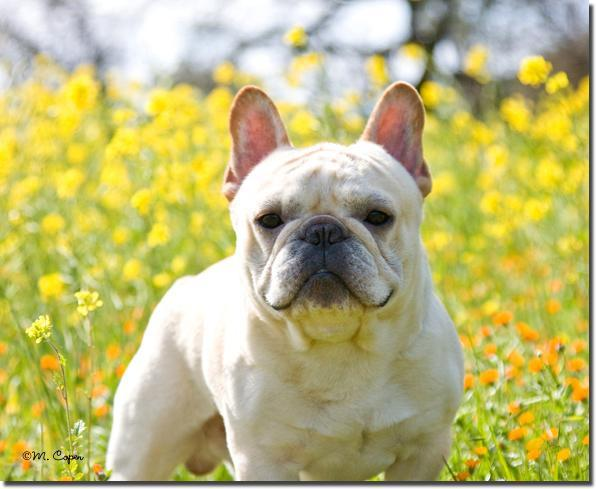

In [50]:
# Verifing one example of the dataset
from IPython.display import Image
Image('MO444_dogs/train/000a40dc09c24bbeb3ddfa8b4876ec03.jpg')

# Download Convolution Network

In [0]:
incept_v2 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Modifiying Model

In [52]:
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(incept_v2)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(83, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 8, 8, 1536)        54336736  
_________________________________________________________________
flatten_2 (Flatten)          (None, 98304)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              100664320 
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 83)                85075     
Total params: 155,086,131
Trainable params: 155,025,587
Non-trainable params: 60,544
_________________________________________________________________


# Generating Validation and Training Set

In [58]:
train_dir = 'MO444_dogs/train/'
validation_dir = 'MO444_dogs/val/'

image_size = (299, 299)

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 

train_batchsize = 10
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=image_size,
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 8300 images belonging to 83 classes.
Found 6022 images belonging to 83 classes.


# Compiling the model

In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('small_last4.h5')